In [3]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
def format_number(num):
    """
    Converts a number into a more readable format, using K for thousands, M for millions, etc.
    Args:
    - num: The number to format.
    
    Returns:
    - A formatted string representing the number.
    """
    if num >= 1e9:
        return f'{num/1e9:.1f}B'
    elif num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}K'
    else:
        return str(num)


In [6]:
dataset = "gonzalobenegas/siraj_gwas_highpip"

benchmark_set_path = f"../../results/benchmark_set/{dataset}.parquet"
metrics_path = f"../../results/merged_metrics/{dataset}.csv"

V = load_dataset(dataset, split="test").to_pandas()
V = V.merge(pd.read_parquet(benchmark_set_path), on=["chrom", "pos", "ref", "alt"], how="inner")
n_pos, n_neg = V.label.sum(), len(V) - V.label.sum()
res = pd.read_csv(metrics_path)

In [14]:
res.Model = res.Model.str.split(".").str[0]

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


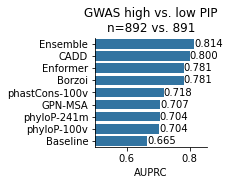

In [17]:
metric = res.columns[-1]
if metric == "AUROC":
    baseline = 0.5
elif metric == "AUPRC":
    baseline = n_pos / (n_pos + n_neg)
plt.figure(figsize=(2,2))
g = sns.barplot(
    data=res,
    y="Model",
    x=metric,
    color="C0",
)
sns.despine()
sample_size = f"n={format_number(n_pos)} vs. {format_number(n_neg)}"
g.set(xlim=baseline, ylabel="")
title = f"GWAS high vs. low PIP\n{sample_size}"
plt.title(title)
for bar, model in zip(g.patches, res.Model):
    text = f'{bar.get_width():.3f}'

    g.text(
        max(bar.get_width(), baseline),  # X position, here at the end of the bar
        bar.get_y() + bar.get_height()/2,  # Y position, in the middle of the bar
        text,  # Text to be displayed, formatted to 3 decimal places
        va='center'  # Vertical alignment
    )
plt.savefig("barplot.pdf", bbox_inches="tight")